In [1]:
!pip install qiskit qiskit-aer pylatexenc --quiet

# --- Core Qiskit imports ---
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error  # optional: used if you add noise simulations
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# --- Math & plotting ---
import numpy as np
import matplotlib.pyplot as plt


def inverse_qft(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc


%matplotlib inline

print("✅ Qiskit environment ready — imports complete.")


  DEPRECATION: Building 'pylatexenc' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pylatexenc'. Discussion can be found at https://github.com/pypa/pip/issues/6334
✅ Qiskit environment ready — imports complete.


## **Task 1: Change the Phase Value**


--- theta = 0.125 ---
Counts: {'001': 2048}


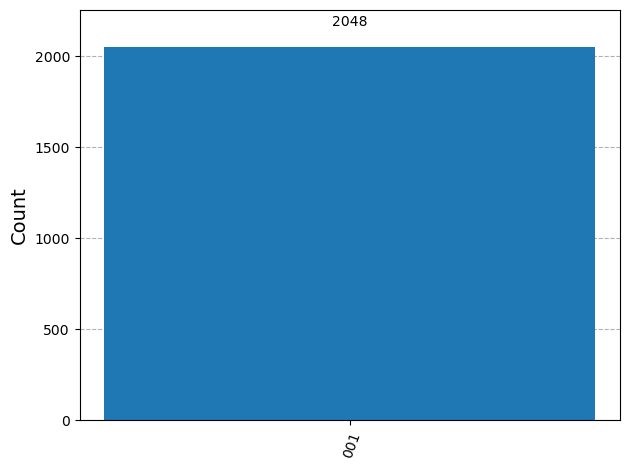

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─

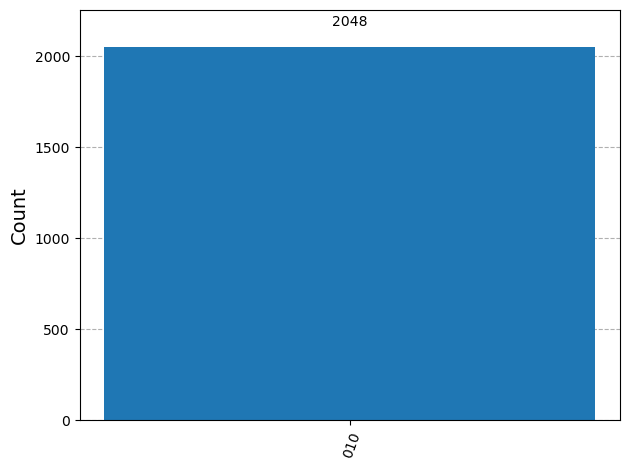

     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─╫─┤M├
«    

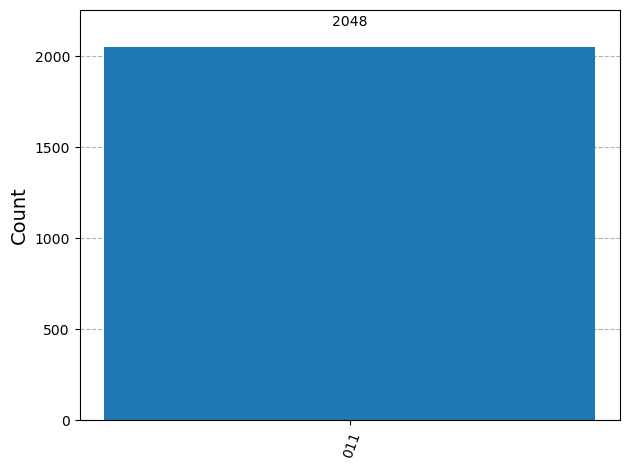

     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐           
«q_0: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_1: ─■─────────╫──────┤M├───
«      │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ─■─────────╫─┤ H ├─╫─┤M├
«          

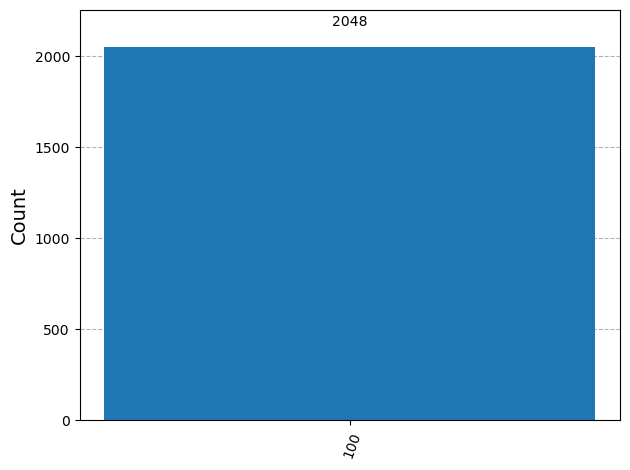

     ┌───┐                          ┌───┐                                   ┌─┐»
q_0: ┤ H ├─■──────────────────────X─┤ H ├─■──────────────■──────────────────┤M├»
     ├───┤ │                      │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘»
q_1: ┤ H ├─┼──────■───────────────┼───────■────────┤ H ├─┼─────────■─────────╫─»
     ├───┤ │      │               │                └───┘ │P(-π/4)  │P(-π/2)  ║ »
q_2: ┤ H ├─┼──────┼───────■───────X──────────────────────■─────────■─────────╫─»
     ├───┤ │P(π)  │P(2π)  │P(4π)                                             ║ »
q_3: ┤ X ├─■──────■───────■──────────────────────────────────────────────────╫─»
     └───┘                                                                   ║ »
c: 3/════════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«                
«q_0: ───────────
«          ┌─┐   
«q_1: ─────┤M├───
«     ┌───┐└╥┘┌─┐
«q_2: ┤ H ├─╫─┤M├
«

In [2]:
def build_qpe(count_qubits, theta):
    """Return a QPE circuit that estimates phase theta using controlled-Rz gates."""
    qc = QuantumCircuit(count_qubits + 1, count_qubits)
    # Prepare counting register
    qc.h(range(count_qubits))
    # Prepare target in |1> (an eigenstate for Rz)
    qc.x(count_qubits)
    # Controlled-U^{2^k} with U = Rz(2*pi*theta)
    for k in range(count_qubits):
        angle = 2 * np.pi * theta * (2 ** k)
        qc.cp(angle, k, count_qubits)
    # Apply inverse QFT on counting register
    inverse_qft(qc, count_qubits)
    # Measure counting register
    qc.measure(range(count_qubits), range(count_qubits))
    return qc

def run_qpe_for_thetas(count_qubits, thetas, shots=2048):
    sim = AerSimulator()
    for theta in thetas:
        print(f"\n--- theta = {theta} ---")
        qc = build_qpe(count_qubits, theta)
        compiled = transpile(qc, sim)
        job = sim.run(compiled, shots=shots)
        res = job.result()
        counts = res.get_counts()
        print("Counts:", counts)
        display(plot_histogram(counts))
        print(qc.draw(output='text'))


theta_list = [0.125, 0.25, 0.375, 0.5]
run_qpe_for_thetas(count_qubits=3, thetas=theta_list)


## **Task 2: Increase Counting Qubits**


--- Using 3 counting qubits (theta=0.375) ---
Counts: {'011': 2048}


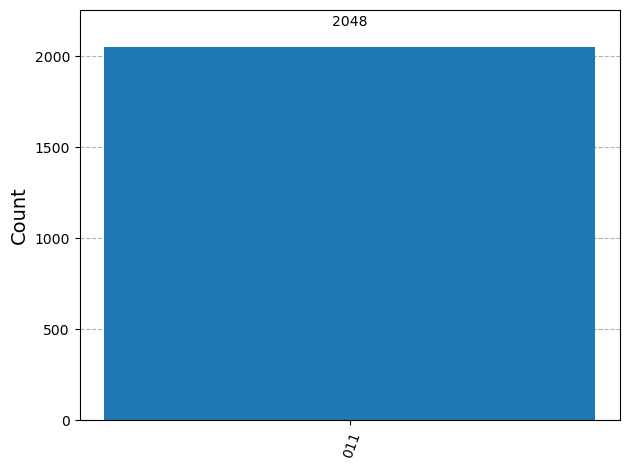

     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐           
«q_0: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_1: ─■─────────╫──────┤M├───
«      │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ─■─────────╫─┤ H ├─╫─┤M├
«          

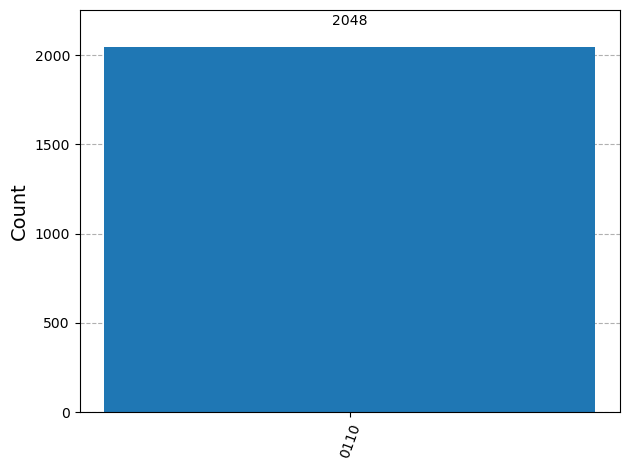

     ┌───┐                                       ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                                   │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■───────────────────X─────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                   │     │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■─────────X─────┼──────────────────────■────────»
     ├───┤ │         │         │               │                               »
q_3: ┤ H ├─┼─────────┼─────────┼───────■───────X───────────────────────────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)  │P(6π)                                  »
q_4: ┤ X ├─■─────────■─────────■───────■───────────────────────────────────────»
     └───┘                                                                     »
c: 4/══════════════════════════════════════════════════════════════════════════»
                            

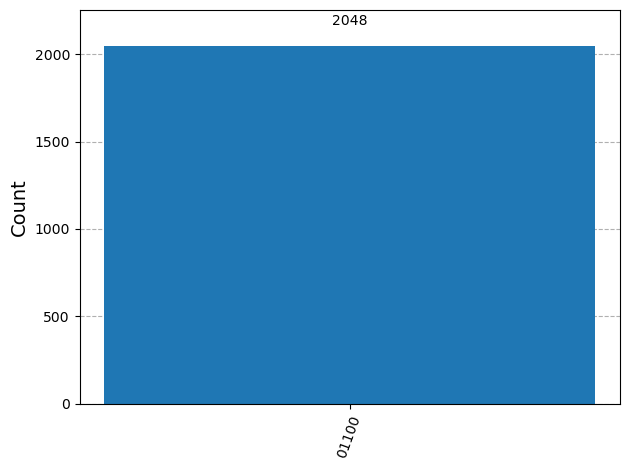

     ┌───┐                                                ┌───┐               »
q_0: ┤ H ├─■────────────────────────────────────────────X─┤ H ├─■─────────────»
     ├───┤ │                                            │ └───┘ │P(-π/2) ┌───┐»
q_1: ┤ H ├─┼─────────■────────────────────────────X─────┼───────■────────┤ H ├»
     ├───┤ │         │                            │     │                └───┘»
q_2: ┤ H ├─┼─────────┼─────────■──────────────────┼─────┼─────────────────────»
     ├───┤ │         │         │                  │     │                     »
q_3: ┤ H ├─┼─────────┼─────────┼───────■──────────X─────┼─────────────────────»
     ├───┤ │         │         │       │                │                     »
q_4: ┤ H ├─┼─────────┼─────────┼───────┼───────■────────X─────────────────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)  │P(6π)  │P(12π)                        »
q_5: ┤ X ├─■─────────■─────────■───────■───────■──────────────────────────────»
     └───┘                              

In [3]:
def qpe_with_varying_counts(theta, count_qubits_list=[3,4,5], shots=2048):
    sim = AerSimulator()
    for c in count_qubits_list:
        print(f"\n--- Using {c} counting qubits (theta={theta}) ---")
        qc = build_qpe(c, theta)
        compiled = transpile(qc, sim)
        job = sim.run(compiled, shots=shots)
        res = job.result()
        counts = res.get_counts()
        print("Counts:", counts)
        display(plot_histogram(counts))
        print(qc.draw(output='text'))

# Example: increase precision for theta = 0.375
qpe_with_varying_counts(theta=0.375, count_qubits_list=[3,4,5])


## **Task 3: Compare with Theoretical Output**

Raw counts: {'0110': 4096}


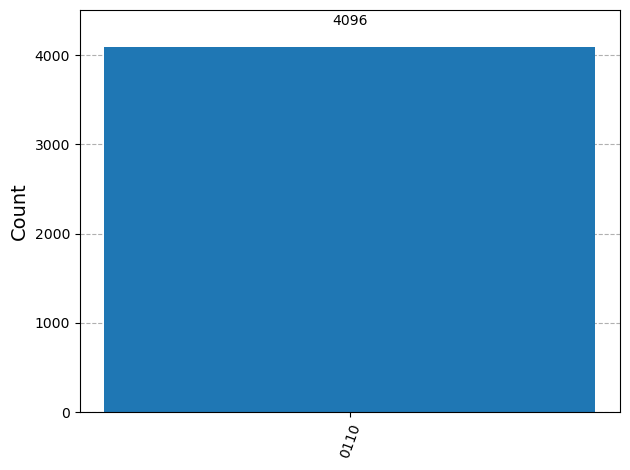


Theoretical best binary (rounded) for theta:
0110

Interpreted measured results (bitstring, decimal, phase, counts):
('0110', 6, 0.375, 4096)


In [4]:

def theoretical_binary(theta, bits):
    """
    Convert theta (a fractional value between 0 and 1) into expected 'bits' binary string.
    If theta cannot be exactly represented in 'bits' bits, this returns the closest representation.
    """
    # fractional to integer using 2^bits
    approx = int(round(theta * (2**bits))) % (2**bits)
    return format(approx, f'0{bits}b')

def interpret_counts(counts):
    """
    Sort and display counts with decimal and phase equivalents.
    """
    processed = []
    for bitstr, cnt in counts.items():
        dec = int(bitstr, 2)
        phase = dec / (2**len(bitstr))
        processed.append((bitstr, dec, phase, cnt))
    # sort by count descending
    processed.sort(key=lambda x: x[3], reverse=True)
    return processed

# Run one example and compare
count_qubits = 4
theta = 0.375  # example
qc = build_qpe(count_qubits, theta)
sim = AerSimulator()
compiled = transpile(qc, sim)
res = sim.run(compiled, shots=4096).result()
counts = res.get_counts()
print("Raw counts:", counts)
display(plot_histogram(counts))

print("\nTheoretical best binary (rounded) for theta:")
print(theoretical_binary(theta, count_qubits))

print("\nInterpreted measured results (bitstring, decimal, phase, counts):")
for row in interpret_counts(counts):
    print(row)


## **Task 4: Inverse QFT Visualization**

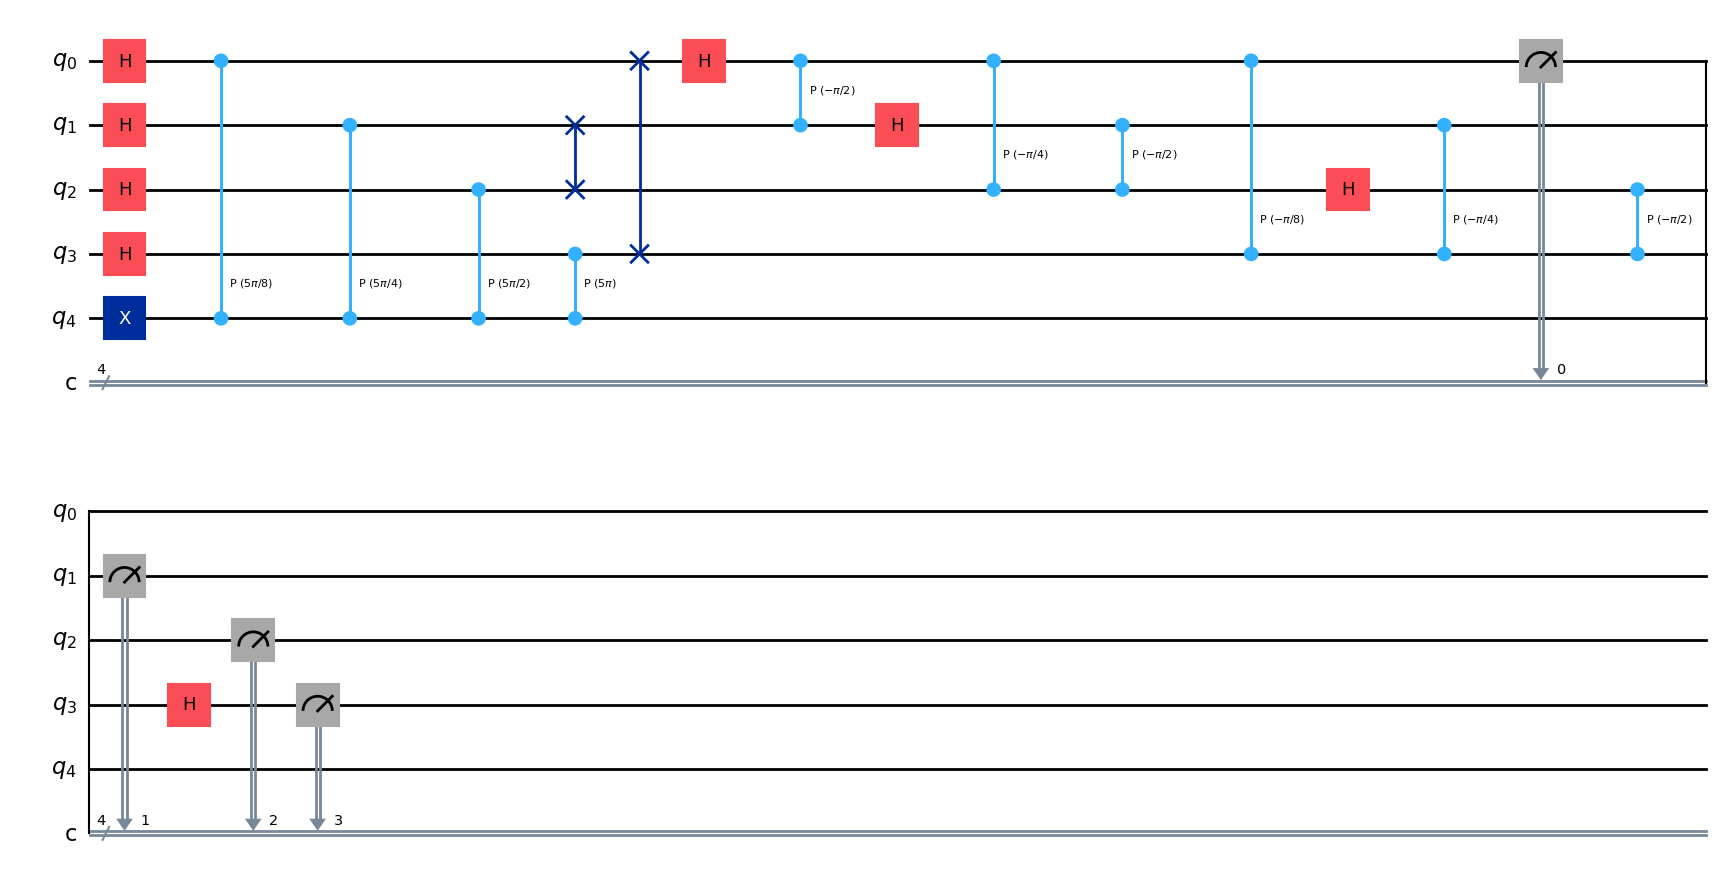

     ┌───┐                                         ┌───┐               »
q_0: ┤ H ├─■─────────────────────────────────────X─┤ H ├─■─────────────»
     ├───┤ │                                     │ └───┘ │P(-π/2) ┌───┐»
q_1: ┤ H ├─┼─────────■─────────────────────X─────┼───────■────────┤ H ├»
     ├───┤ │         │                     │     │                └───┘»
q_2: ┤ H ├─┼─────────┼─────────■───────────X─────┼─────────────────────»
     ├───┤ │         │         │                 │                     »
q_3: ┤ H ├─┼─────────┼─────────┼─────────■───────X─────────────────────»
     ├───┤ │P(5π/8)  │P(5π/4)  │P(5π/2)  │P(5π)                        »
q_4: ┤ X ├─■─────────■─────────■─────────■─────────────────────────────»
     └───┘                                                             »
c: 4/══════════════════════════════════════════════════════════════════»
                                                                       »
«                                                  

In [5]:

count_qubits = 4
theta = 0.3125  # example

qc_vis = build_qpe(count_qubits, theta)
# Draw with mpl (visual)
fig = qc_vis.draw(output='mpl')
display(fig)

# Also print ASCII for quick scanning
print(qc_vis.draw(output='text'))


## **Task 5: Noise Simulation**


Ideal counts:
{'001': 2048}


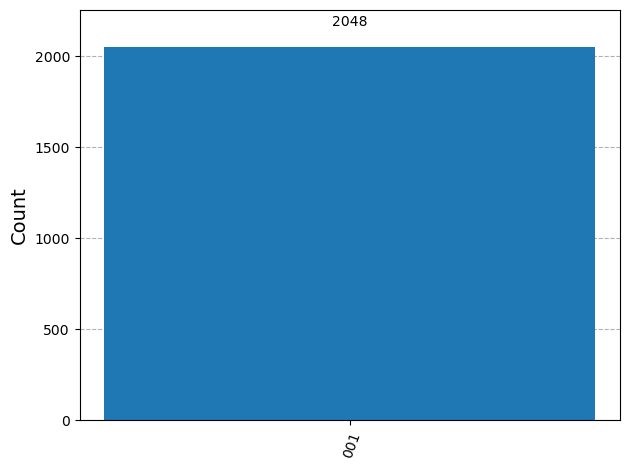


Noisy counts:
{'100': 184, '110': 99, '001': 833, '000': 273, '010': 153, '101': 220, '111': 138, '011': 148}


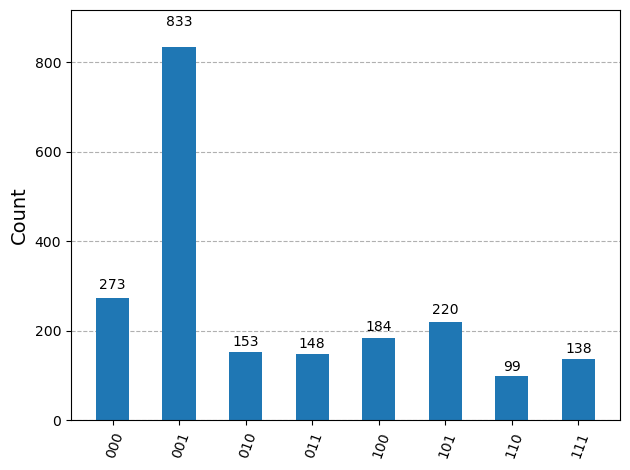

In [6]:

def noisy_qpe_run(count_qubits, theta, shots=2048, sjk_singles=0.02, sjk_twos=0.08):
    # Build circuit
    qc = build_qpe(count_qubits, theta)
    # Ideal simulator run
    ideal_sim = AerSimulator()
    compiled_ideal = transpile(qc, ideal_sim)
    res_ideal = ideal_sim.run(compiled_ideal, shots=shots).result()
    counts_ideal = res_ideal.get_counts()

    # Create a simple depolarizing noise model
    nm = NoiseModel()
    nm.add_all_qubit_quantum_error(depolarizing_error(sjk_singles, 1), ['h','x','rz','u1','u2','u3','id'])
    nm.add_all_qubit_quantum_error(depolarizing_error(sjk_twos, 2), ['cx','cz'])

    noisy_sim = AerSimulator(noise_model=nm)
    compiled_noisy = transpile(qc, noisy_sim)
    res_noisy = noisy_sim.run(compiled_noisy, shots=shots).result()
    counts_noisy = res_noisy.get_counts()

    print("\nIdeal counts:")
    print(counts_ideal)
    display(plot_histogram(counts_ideal))
    print("\nNoisy counts:")
    print(counts_noisy)
    display(plot_histogram(counts_noisy))

# Example noisy comparison
noisy_qpe_run(count_qubits=3, theta=0.125, shots=2048, sjk_singles=0.03, sjk_twos=0.09)
